# Working with Numbers in Python
## Python Data Analysis Library - Pandas



We've started to grapple with numbers, strings, and lists and how they might be used in text analysis. Sometimes we will use these methods to dig deeper into the text - to enable more productive deep readings. Other times we might want to turn text into numbers, either for "distant reading," or even to perform some statistical analyses on the text.

Today we will learn the basics of the Python library pandas, which is designed for (numerical) data analysis. It is similar to spreadsheets, such as those in Excel, or the dataframe in Stata or R, if you have used those. It is my favoriate place to do data/text munging and basic statistics. There are other libraries for more sophisticated statistics in Python.

Today we will just explore numerical analysis. In the weeks to come we will explore how we can use pandas in the text analysis pipeline.

### Learning Goals

* Get familiar with the pandas libarary
* Learn some basic functions to summarize numerical data
* Have a foundation in pandas so we can use it on text as data in the weeks to come

### Outline

* Introduction to pandas and the dataframe
* Summarizing real data using pandas


# 1. Pandas


<i>Pandas</i> is a popular and flexible package whose primary use is its datatype: the <i>DataFrame</i>. The dataframe is essentially a spreadsheet, like you would find in Excel, but it integrates seamlessly into a Natural Language Processing workflow and it has a few tricks up its sleeve.

In [1]:
# Get ready!

import pandas

We have to first introduce a new datatype, lists of lists, or lists with sub-lists. We will use this to create a toy example of a dataset in pandas. Our toy dataset will include a sample of three people, and their weekly income and education level.

In [2]:
# Create a list of three sub-lists, each with two entries.

square_list = [[100,'high school'],[400,'BA'],[700,'MA']]

In [3]:
# We can slice lists of lists like we do lists
# Question: What do you expect the output to be?

square_list[2]

[700, 'MA']

In [4]:
# Now the interesting stuff. Create a dataframe from that list. 
# The output here should look familiar, like a spreadsheet

pandas.DataFrame(square_list)

,0,1
0,100,high school
1,400,BA
2,700,MA


In [6]:
# We can create a list for our column labels to add to our dataframe

column_names = ['income', 'education']
row_names = ['Laura', 'Heather', 'KT']


In [7]:
# A-ha!

pandas.DataFrame(square_list, columns = column_names, index=row_names)

,income,education
Laura,100,high school
Heather,400,BA
KT,700,MA


In [26]:
# Assign this to a variable

df = pandas.DataFrame(square_list, columns = column_names, index=row_names)
df

,income,education
Laura,100,high school
Heather,400,BA
KT,700,MA


In [18]:
# Call up a column of the dataframe

df['income']
df.income

Laura      100
Heather    400
KT         700
Name: income, dtype: int64

In [12]:
# Make that column into a list

list(df['income'])

[100, 400, 700]

In [13]:
# Get the indices for the entries in the column

df['income'].index

Index(['Laura', 'Heather', 'KT'], dtype='object')

In [15]:
# Call up a row from the indices
df.iloc[1]

income       400
education     BA
Name: Heather, dtype: object

In [19]:
# Call up a couple of rows, using a list of indices

df.loc[['Laura','Heather']]

,income,education
Laura,100,high school
Heather,400,BA


In [20]:
# Get a specific entry by calling both row and column

df.loc['Laura']['income']

100

In [24]:
# Temporarily re-order the dataframe by values in the 'income' column

df.sort_values('income', ascending=False)

In [51]:
# Create a new column

df['age'] = [22,31,35]

In [25]:
# Inspect

df

,income,education,age
KT,700,MA,35
Heather,400,BA,31
Laura,100,high school,22


In [33]:
## EX. Call up the entries (400 and BA) from the middle of the dataframe 'df' individually

## CHALLENGE: Call up both entries at the same time

df.loc['Heather'][['income', 'education']]


income       400
education     BA
Name: Heather, dtype: object

### DataFrame Subsetting

In [34]:
# Slice out a column

df['income']

Laura      100
Heather    400
KT         700
Name: income, dtype: int64

In [35]:
# Evaluate whether each element in the column is equal to 100

df['income']==100

Laura       True
Heather    False
KT         False
Name: income, dtype: bool

In [36]:
# We can also use evaluation to subset the table. This time we'll use the greater than evaluator.
#df['income']>200
df[df['income']>200]

,income,education
Heather,400,BA
KT,700,MA


In [40]:
## EX. Slice 'df' to contain only rows in which 'education' equals 'BA' (remeber how to specify a string!)
df[df['education']=='BA']

,income,education
Heather,400,BA


# 3. Arithmetic!

In [41]:
# Our dataframe

df

,income,education
Laura,100,high school
Heather,400,BA
KT,700,MA


In [42]:
# Pandas will produce a few descriptive statistics for each row, but only columns that are numbers

df.describe()

,income
count,3.0
mean,400.0
std,300.0
min,100.0
25%,250.0
50%,400.0
75%,550.0
max,700.0


In [43]:
# Multiply entries of the dataframe by 10

df*10

,income,education
Laura,1000,high schoolhigh schoolhigh schoolhigh schoolhi...
Heather,4000,BABABABABABABABABABA
KT,7000,MAMAMAMAMAMAMAMAMAMA


In [44]:
# Add 10 to each entry

df+10

TypeError: Could not operate 10 with block values Can't convert 'int' object to str implicitly

We can't do it! Why not?

In [48]:
#We can do it if we specify a column

df['income']+10

Laura      110
Heather    410
KT         710
Name: income, dtype: int64

In [49]:
# Of course our dataframe hasn't changed

df

,income,education
Laura,100,high school
Heather,400,BA
KT,700,MA


In [50]:
# What if we just want to add the values in the column?

df['income'].sum()

1200

In [53]:
# We can also perform operations among columns
# Pandas knows to match up individual entries in each column

df['income_age'] = df['income']/df['age']
df

,income,education,age,income_age
Laura,100,high school,22,4.545455
Heather,400,BA,31,12.903226
KT,700,MA,35,20.000000


In [54]:
# EX: .sum() adds the values in a column. .mean() calculate the mean value in a column.
#     Find the mean income and the mean age for the dataframe df()
df[['income', 'age']].mean()

income    400.000000
age        29.333333
dtype: float64

# 2. Summarzing Real Data

Now let's read in a dataset containing real world data. The data is a .csv file you should have saved in the 'data' folder. These data are from the [National Survey of Family Growth](http://cdc.gov/nchs/nsfg.htm). It's from Cycle 6, the years 2002-2003. The survey contains information on pregnancy and births in the U.S.

First read in the data:

In [55]:
#we'll assign it to the variable name df again, to keep things consistent
df = pandas.read_csv("../data/nsfg_data1.csv.bz2", compression='bz2', index_col = 0)
#view our data. Note: 'NaN' indicates the value is missing
df

,agepreg,insuranc,totalwgt_lb,pregordr
0,33.16,Private,8.8125,1
1,39.25,Private,7.8750,2
2,14.33,Public,9.1250,1
3,17.83,Public,7.0000,2
4,18.33,Public,6.1875,3
5,27.00,Private,8.5625,1
6,28.83,Private,9.5625,2
7,30.16,Private,8.3750,3
8,28.08,Private,7.5625,1
9,32.33,Private,6.6250,2


In [56]:
#Typically the first thing we want to do is describe our data.
df.describe()

,agepreg,totalwgt_lb,pregordr
count,13241.000000,9038.000000,13593.000000
mean,24.688151,7.265628,2.349150
std,5.814708,1.408293,1.577807
min,10.330000,0.125000,1.000000
25%,20.080000,6.500000,1.000000
50%,23.910000,7.375000,2.000000
75%,28.660000,8.125000,3.000000
max,44.080000,15.437500,19.000000


This describes the columns that contain numbers as values. To summarize the columns that contain strings, we can use the .value_counts() function. This counts the number of rows for each unique value in the specified column.

In [57]:
df['insuranc'].value_counts()

Private    7339
Public     3590
None       2664
Name: insuranc, dtype: int64

We can visualize the distribution of the two number columns by creating a histogram.

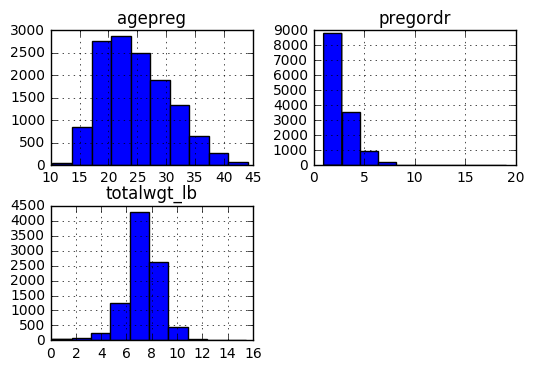

In [58]:
# The main visualization, or plotting, library in Python is matplotlib
import matplotlib.pyplot as plt
df.hist()
plt.show()

Quite often when we are analyzing data we want to know the relationship between two variables. Here we may want to know the relationship between whether the respondent had health insurance and how it is related to their age at pregnancy and the birthweight of their baby.

We can easily do this by using the groupby function, which groups all rows that share the same value in a particular column and performs an operation on the rest of the columns. 

Let's find out if the *average* age at pregnancy and the *average* birth weight are different for respondents who have no health insurance, private insurance, and public insurance.

In [63]:
#group by the column insuranc, and calculate the mean for each group for the rest of the columns
grouped = df.groupby('insuranc').mean()
grouped

,agepreg,totalwgt_lb,pregordr
insuranc,,,
None,23.747388,7.152968,2.444820
Private,25.770028,7.377307,2.154517
Public,23.172923,7.123853,2.676045


In [ ]:
## EX: Create a new grouped by dataframe, called 'grouped_new', that groups the dataframe by pregorder
##     and calculates the mean for the other variables. Print this out.

In [ ]:
## EX: Sort this new grouped by dataframe by the age at pregnancy, in descending order
##     so that the oldest average age at pregnancy is at the top.

In [ ]:
## EX: In the original dataframe ('df'), print the number of rows for each unique value in the pregordr column
## EX: Print the subset of the dataframe with only those rows where the pregordr is 15 or greater

In [ ]:
## EX: In the original dataframe ('df'), create a new column that contains the age at pregnancy
##   divided by the pregnancy order. Print out the dataframe to see the new column.
##   (Note: There is not a sensible mathematical reason for this that I can think of. This is just to practice pandas.)